# Colab Notebook created for ARAP module at UPC ETSETB.

**Authors**: Juan José Nieto, Margarita Cabrera-Bean, Josep Vidal

In [ ]:
Student = '' #@param {type:"string"}

# GRID WORLD
Exercises based on Richard S. Sutton and Andrew G. Barto book.

[Open to access description of tasks](https://drive.google.com/file/d/1PUpvtq1mXGLIxYcksXuR4Nr7WmV0ILkJ/view?usp=sharing)

## Complete the TODOs you will find in the notebook:

1.  Initialize the variable POLICY p(s'|a,s).
2.  Initialize the corresponding rewards in *step* function.
3.  Compute the reward vector and the transition probability matrix.
4.  Compute Bellman Equation
-------------------------------------------------
5.  Compute update of the state value
6.  Program Policy Iteration Algorithm
7.  Program Value Iteration Algorithm






In [ ]:
import numpy as np
import seaborn as sns

from random import random
import matplotlib.pyplot as plt

In [ ]:
class Grid():
    def __init__(self):
        self.N_ROWS = 5
        self.N_COLUMNS = 5
        self.N_STATES = self.N_ROWS * self.N_COLUMNS

        self.GAMMA = 0.9
        self.ZETA_MAX = 1e-3
        self.ITER_MAX = 100
        
        self.ACTIONS = [(0, -1), (1, 0), (0, 1), (-1, 0)]
        self.N_ACTIONS = 4
        
        # 1.TODO: Initialize with equal probability for each action in each state
        self.POLICY = TODO

        self.SPC_STATES = [(5, 9, 10), (15, 17, 5)] # (ini state, fin state, reward)

        self.TrPrM = np.zeros((self.N_STATES, self.N_STATES))
        self.V_FUNCTION = np.zeros(self.N_STATES)
        self.REWARD = np.zeros(self.N_STATES)


    ''' Convert state s from scalar to coordinates x,y '''
    def get_XY(self, state):
        return (state % self.N_ROWS, int(state / self.N_ROWS))

    ''' Convert coordinates x,y to scalar state '''
    def get_state(self, state):
        return state[1]*self.N_COLUMNS + state[0]


    '''
    Check if state is special

    Params:
        - int: state [0,...,24]
    Returns:
        - bool: is_special
        - int: next_state
        - int: reward
    '''
    def is_special(self, state):
        for spc in self.SPC_STATES:
            if spc[0] == state:
                return True, spc[1], spc[2]
        return False, None, None



    '''
    Computes next state and reward

    Params:
        - int: state [0,...,24]
    Returns:
        - int: next_state
        - int: reward
    '''
    def step(self, state, action):
        (x,y) = self.get_XY(state)
        (ax, ay) = self.ACTIONS[action]

        next_state = (x + ax, y + ay)

        special = self.is_special(state)    # returns (is_special, next_state, reward)

        # 2.TODO: Complete the TODOs with the corresponding rewards
        if special[0]:                                                  # special state
            return special[1], TODO

        elif next_state[0] > -1 and next_state[0] < self.N_ROWS and \
            next_state[1] > -1 and next_state[1] < self.N_COLUMNS:      # agent within the limits of the grid

            next_state = self.get_state(next_state)
            return next_state, TODO

        else:                                                           # agent is trying to overpass the limits of the grid
            return state, TODO


### Plot functions

In [ ]:
'''Insert title, and axis labels to plots'''
def insert_labels(labels, ax):
    if 'title' in labels:
        ax.set_title(labels['title']) 
    if 'xlabel' in labels:
        ax.set_xlabel(labels['xlabel']) 
    if 'ylabel' in labels:
	    ax.set_ylabel(labels['ylabel'])


'''Plot for showing value functions'''
def plot_heatmap(data, **kwargs):
    fig, ax = plt.subplots()
    sns.heatmap(data, cmap='coolwarm')
    insert_labels(kwargs, ax)

'''Plot for showing how the difference of state-values decrease over time'''
def plot_deltas(data, **kwargs):
    fig, ax = plt.subplots()
    plt.plot(data)
    insert_labels(kwargs, ax)

'''Policy plots. Indicates action taken in each state.'''
def plot_arrow(data, actions, **kwargs):

    fig, ax = plt.subplots()

    U = np.array([[actions[y][0] for y in x] for x in data])
    V = np.array([[actions[y][1] for y in x] for x in data])

    X = np.arange(0, 5, 1)
    Y = np.arange(0, 5, 1)

    q = ax.quiver(X, Y, V, U*-1)
    plt.imshow(data, cmap=plt.cm.Pastel1)
    

    insert_labels(kwargs, ax)
    ax.axis('off')
    plt.show()


'''Group of N policy plots.'''
def plot_arrows(data, actions):
    # Only pick 2 first actions matrices and last one (optimal policy)
    num_policies = len(data)

    fdata = data[:min(2, num_policies)] + data[-1:]
    
    for i, d in enumerate(fdata):
        labels = {
            'title': f"{i if len(fdata)-1 > i else 'Optimal'} Policy"
        }
        plot_arrow(d, actions, **labels)


## TRANSITION PROBABILITY MATRIX AND OPTIMAL VALUE FUNCTION

In [ ]:
grid = Grid()

for s in range(grid.N_STATES):
    for a in range(grid.N_ACTIONS):
        
        next_state, reward = grid.step(s, a)
        # 3.TODO: Compute reward vector and transition prob matrix. 
        grid.TrPrM[s, next_state] += TODO
        grid.REWARD[s] += TODO

In [ ]:
# PLOT TRANSITION MATRIX
conf = {
    'title': 'Transition Probability Matrix',
    'xlabel': 'sp state',
    'ylabel': 's state'
}
plot_heatmap(grid.TrPrM, **conf)

In [ ]:
# COMPUTE UNIFORM POLICY VALUE FUNCTION AND PLOT IT

# 4.TODO: Compute Bellman Equation 
value_f = TODO

vf_matrix = np.transpose(np.reshape(value_f, (grid.N_ROWS, grid.N_COLUMNS)))
conf = {
    'title': 'Uniform Policy Value Function',
}
plot_heatmap(vf_matrix, **conf)

## POLICY EVALUATION

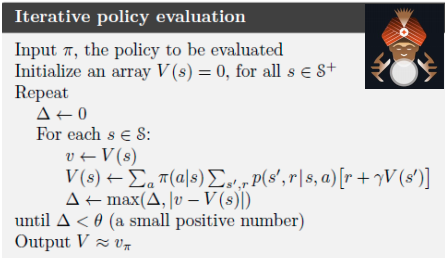

In [ ]:
'''
In this case we define a function since we will use this algorithm
within 'policy iteration' algorithm
'''
def policy_evaluation(grid):
    zeta = grid.ZETA_MAX + 1
    iter = 0
    v_incr = []

    while zeta > grid.ZETA_MAX and iter < grid.ITER_MAX + 1:
        
        vm_aux = grid.V_FUNCTION.copy()                                 # Store current state-values ONLY for later comparison

        for s in range(grid.N_STATES):                                  # Loop over all the states
            vs_aux = 0
            for a in range(grid.N_ACTIONS):                             # Loop over all actions in each state
                next_state, reward = grid.step(s, a)           # Compute next_state and reward when taking action a in state s

                # 5.TODO: Compute the update of the state value
                vs_aux += TODO
        
            grid.V_FUNCTION[s] = vs_aux                                 # Update state-value with the result of Bellman Equation
        
        zeta = np.max(np.abs(grid.V_FUNCTION - vm_aux))                 # Compute the difference between current state-values and previous ones
        v_incr.append(zeta)
        iter += 1
    

In [ ]:
grid = Grid()
policy_evaluation(grid)

In [ ]:
vf_matrix = np.transpose(np.reshape(grid.V_FUNCTION, (grid.N_ROWS, grid.N_COLUMNS)))

conf = {
    'title': 'Policy Evaluation Value Function',
}
plot_heatmap(vf_matrix, **conf)


conf= {
    'title': 'VF Incremental',
    'xlabel': 'Iterations'
}
plot_deltas(v_incr, **conf)


## POLICY ITERATION

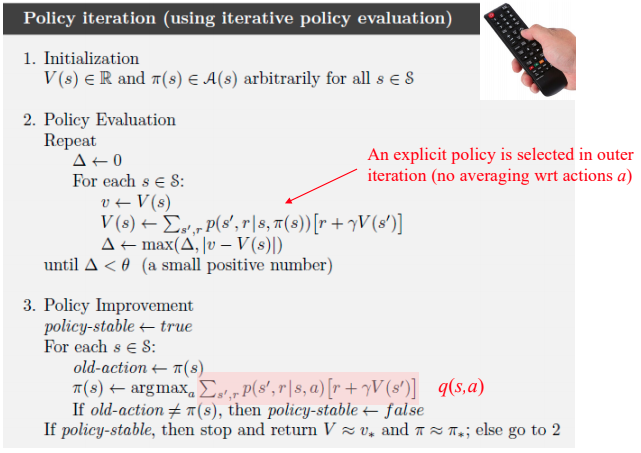

In [ ]:
grid = Grid()

iter = 0
it_max = 10
ac_dif = 1

actions_list = []       # Store actions taken in each state for each run. [[a1, ... , a25], ... , [a1, ... , a25]]
a_inc = []              # Store number of different actions taken in each run.


while ac_dif > 0 and iter < it_max + 1:
    ac_dif = 0
    actions = []        # Store actions taken in each state in one run. [a1, ..., a25]
    
    # 6.TODO: Program Policy Iteration Algorithm (you must make use of policy_evaluation function)
    

    

    #####

    actions_list.append(np.transpose(np.array(actions).reshape(grid.N_ROWS,grid.N_COLUMNS)))
    a_inc.append(ac_dif)

    iter += 1

In [ ]:
vf_matrix = np.transpose(np.reshape(grid.V_FUNCTION, (grid.N_ROWS, grid.N_COLUMNS)))

conf = {
    'title': 'Policy Iteration Value Function',
}
plot_heatmap(vf_matrix, **conf)


conf= {
    'title': '# of dif. actions between consecutive policies',
    'xlabel': 'Iterations'
}
plot_deltas(a_inc, **conf)



In [ ]:
plot_arrows(actions_list, grid.ACTIONS)

## VALUE ITERATION

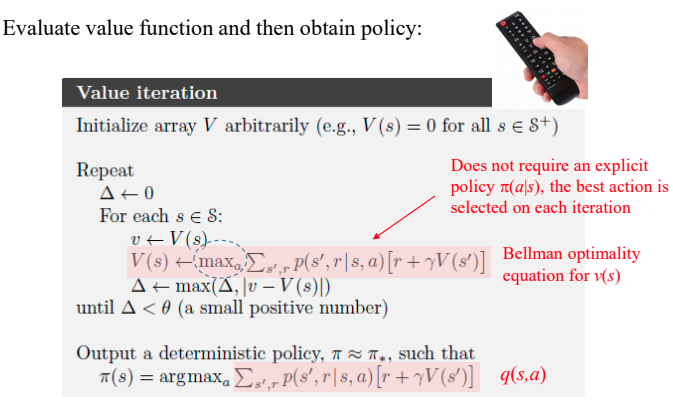

In [ ]:

grid = Grid()
zeta = grid.ZETA_MAX + 1
iter = 0
v_incr = []
a_inc = []

while zeta > grid.ZETA_MAX and iter < grid.ITER_MAX + 1:
    ac_dif = 0
    vm_aux = grid.V_FUNCTION.copy()

    # 7.TODO: Program Value Iteration Algorithm (do NOT make use of policy_evaluation function)
    


    
    ########

    a_inc.append(ac_dif)                                # Number of actions taken differently from previous iteration
    zeta = np.max(np.abs(grid.V_FUNCTION - vm_aux))     # Compute the difference of the state-values
    v_incr.append(zeta)                                 # Store the difference in v_incr list
    iter += 1


In [ ]:
vf_matrix = np.transpose(np.reshape(grid.V_FUNCTION, (grid.N_ROWS, grid.N_COLUMNS)))

conf = {
    'title': 'Value Iteration Value Function',
}
plot_heatmap(vf_matrix, **conf)


conf= {
    'title': '# of dif. actions between consecutive policies',
    'xlabel': 'Iterations'
}
plot_deltas(a_inc, **conf)

conf= {
    'title': 'VF Incremental',
    'xlabel': 'Iterations'
}
plot_deltas(v_incr, **conf)


In [ ]:
conf= {
    'title': 'Optimal Policy'
}

actions = [np.argmax(grid.POLICY[s]) for s in range(grid.N_STATES)]
action_arrows = np.transpose(np.array(actions).reshape(grid.N_ROWS,grid.N_COLUMNS))
plot_arrow(action_arrows, grid.ACTIONS, **conf)